In [1]:
# allows to import own functions
import sys
import os
import re
root_project = re.findall(r'(^\S*TFM-master)', os.getcwd())[0]
sys.path.append(root_project)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import json
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.utils.help_func import results_searchcv, take_samples

from scipy import stats


sns.set()

/disks/hdd2T/Drive/TFM-master/conda_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [46]:
df_train_val_set = pd.read_pickle(
    f"{root_project}/data/processed/train_val_set.pickle")
df_train_val_set

,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,...,degree,closeness,country_pop,country_departures,exposed_pop,inf_pow_1_log,inf_pow_2_log,mort_pow_1_log,mort_pow_2_log,mort_pow_3_log
0,GUM,14.203296,1.161830,16.501822,0.887782,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.090090,0.416510,165768.0,6164,6.446149e+08,-36.043653,-36.043653,-36.043653,-36.043653,-36.043653
1,LCA,17.483258,1.229768,21.500351,0.037695,3.724857e+03,1.511804e+03,0.051795,0.038839,0.491359,...,0.085586,0.430233,181889.0,1278,4.327815e+08,8.222784,7.321059,-2.960464,-3.248323,-0.710580
2,THA,19.899512,0.788838,15.697486,0.393515,1.487571e+03,4.821400e+03,0.310237,0.268013,3.409499,...,0.495495,0.532374,69428524.0,27303,5.158672e+09,7.304900,8.480820,-1.170418,-1.316718,1.226565
3,FRA,14.883676,0.146264,2.176939,0.110532,4.359223e+08,4.751044e+06,0.106785,0.358147,0.164219,...,0.995495,0.634286,66987244.0,73738,6.182311e+09,19.892975,15.373875,-2.236934,-1.026812,-1.806555
4,CRI,18.500381,0.471475,8.722473,0.011745,6.495027e+05,1.893877e+04,0.027815,0.018522,0.079043,...,0.108108,0.408088,4999441.0,2957,6.733044e+08,13.383962,9.848967,-3.582191,-3.988777,-2.537761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502666,MNG,21.109909,0.494809,10.445363,0.035514,7.249692e+05,1.024410e+05,0.046909,0.023123,0.228142,...,0.063063,0.392920,3170208.0,14328,1.798568e+09,13.493884,11.537042,-3.059536,-3.766941,-1.477785
502667,BGR,11.058661,0.450242,4.979075,0.548584,7.830971e+04,2.514892e+05,0.259003,0.188182,1.153160,...,0.216216,0.456790,7024216.0,18354,7.239566e+08,11.268427,12.435155,-1.350917,-1.670347,0.142506
502668,RUS,3.992636,4.730086,18.885515,0.230425,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.630631,0.556391,144478050.0,114969,4.727207e+09,-36.043653,-36.043653,-36.043653,-36.043653,-36.043653
502669,ATG,20.865943,0.660657,13.785240,0.035386,3.783279e+04,1.295986e+04,0.043156,0.022047,0.284693,...,0.121622,0.433594,96286.0,915,5.323834e+08,10.540931,9.469612,-3.142932,-3.814583,-1.256344


In [70]:
df_v1 = pd.read_csv(
        f"{root_project}/data/processed/simulation_results_v1.csv")
df_v1

,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,react_time,total_infected,total_deceased,total_recovered
0,NIC,15.127089,1.432646,21.671765,0.810188,0.000000,0.000000,0.000000,0.000000,0.000000,0,13,1.000000e+00,0.000000e+00,0.000000e+00
1,MAC,11.712490,1.513652,17.728633,0.300084,23.071429,49.500000,0.445820,0.727273,3.891892,18,30,3.959359e+09,3.332951e+09,6.264778e+08
2,ZWE,11.196699,0.973025,10.894668,0.201303,1162.785714,2241.777778,0.195651,0.157861,1.262386,18,23,7.193707e+09,4.940972e+09,2.252924e+09
3,GNQ,2.841725,8.012827,22.770250,0.930842,0.000000,0.000000,0.000000,0.000000,0.000000,5,7,1.000000e+00,0.000000e+00,0.000000e+00
4,SAU,15.554773,1.814752,28.228049,0.468460,1.214286,1.000000,0.823529,7.000000,7.000000,5,24,5.458733e+06,5.074933e+06,3.835420e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405558,TUV,6.373895,2.465363,15.713962,0.031234,117.357143,35.930233,0.079124,0.084142,0.364146,12,11,4.958664e+09,1.632632e+09,3.326406e+09
405559,SGP,14.094627,0.612625,8.634717,0.336744,24893.214286,52213.300000,0.210026,0.140185,1.351883,15,18,7.461168e+09,5.551956e+09,1.909403e+09
405560,CYP,17.332350,0.752449,13.041716,0.278650,4996.714286,13803.285714,0.213640,0.154673,1.865560,17,7,5.937905e+09,4.656681e+09,1.281389e+09
405561,SAU,14.635425,1.487165,21.765288,0.626039,0.000000,0.000000,0.000000,0.000000,0.000000,2,9,1.000000e+00,0.000000e+00,0.000000e+00


In [71]:
df_v1.describe()

,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,react_time,total_infected,total_deceased,total_recovered
count,405563.000000,405563.000000,405563.000000,405563.000000,4.055630e+05,4.055630e+05,405563.000000,4.055630e+05,405563.000000,405563.000000,405563.000000,4.055630e+05,4.055630e+05,4.055630e+05
mean,11.002433,2.047746,16.014810,0.424019,2.497541e+06,5.049578e+05,0.291485,-1.050362e+01,2.085600,9.506257,15.514265,3.088199e+09,1.930390e+09,1.164129e+09
std,5.189857,1.963627,8.075393,0.278744,2.142642e+07,3.476482e+06,2.821701,4.425962e+03,3.247747,5.764385,8.648659,3.363096e+09,2.237358e+09,1.668011e+09
min,2.000012,0.100827,2.000246,0.010000,0.000000e+00,-9.590619e+06,0.000000,-2.076870e+06,0.000000,0.000000,1.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.513790,0.818845,9.048061,0.181072,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000,8.000000,1.000000e+00,0.000000e+00,0.000000e+00
50%,11.003261,1.457243,16.017416,0.385904,1.921429e+01,2.516667e+01,0.186182,1.387850e-01,0.891443,10.000000,16.000000,1.173453e+08,8.670039e+07,2.453294e+07
75%,15.494150,2.485832,23.022465,0.646870,2.046714e+03,2.441544e+03,0.438342,6.449276e-01,2.900000,15.000000,23.000000,7.207543e+09,4.100408e+09,1.935214e+09
max,19.999707,14.904078,29.999911,0.999996,5.185849e+08,9.676703e+07,1274.000000,5.611237e+04,115.000000,19.000000,30.000000,7.532938e+09,6.678627e+09,7.353940e+09


In [72]:
df_v1.isna().sum()

i_country          0
R0                 0
Tc                 0
Tr                 0
omega              0
inf_pow_1          0
inf_pow_2          0
mort_pow_1         0
mort_pow_2         0
mort_pow_3         0
n_closed           0
react_time         0
total_infected     0
total_deceased     0
total_recovered    0
dtype: int64

In [73]:
df_v1['log'] = np.log(df_v1['mort_pow_2'].replace(0, np.finfo(float).eps))
# df_v1['log'] = np.log(df_v1['mort_pow_2'])

df_v1

/disks/hdd2T/Drive/TFM-master/conda_env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,react_time,total_infected,total_deceased,total_recovered,log
0,NIC,15.127089,1.432646,21.671765,0.810188,0.000000,0.000000,0.000000,0.000000,0.000000,0,13,1.000000e+00,0.000000e+00,0.000000e+00,-36.043653
1,MAC,11.712490,1.513652,17.728633,0.300084,23.071429,49.500000,0.445820,0.727273,3.891892,18,30,3.959359e+09,3.332951e+09,6.264778e+08,-0.318454
2,ZWE,11.196699,0.973025,10.894668,0.201303,1162.785714,2241.777778,0.195651,0.157861,1.262386,18,23,7.193707e+09,4.940972e+09,2.252924e+09,-1.846041
3,GNQ,2.841725,8.012827,22.770250,0.930842,0.000000,0.000000,0.000000,0.000000,0.000000,5,7,1.000000e+00,0.000000e+00,0.000000e+00,-36.043653
4,SAU,15.554773,1.814752,28.228049,0.468460,1.214286,1.000000,0.823529,7.000000,7.000000,5,24,5.458733e+06,5.074933e+06,3.835420e+05,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405558,TUV,6.373895,2.465363,15.713962,0.031234,117.357143,35.930233,0.079124,0.084142,0.364146,12,11,4.958664e+09,1.632632e+09,3.326406e+09,-2.475245
405559,SGP,14.094627,0.612625,8.634717,0.336744,24893.214286,52213.300000,0.210026,0.140185,1.351883,15,18,7.461168e+09,5.551956e+09,1.909403e+09,-1.964795
405560,CYP,17.332350,0.752449,13.041716,0.278650,4996.714286,13803.285714,0.213640,0.154673,1.865560,17,7,5.937905e+09,4.656681e+09,1.281389e+09,-1.866440
405561,SAU,14.635425,1.487165,21.765288,0.626039,0.000000,0.000000,0.000000,0.000000,0.000000,2,9,1.000000e+00,0.000000e+00,0.000000e+00,-36.043653


In [74]:
df_v1.describe()

,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,react_time,total_infected,total_deceased,total_recovered,log
count,405563.000000,405563.000000,405563.000000,405563.000000,4.055630e+05,4.055630e+05,405563.000000,4.055630e+05,405563.000000,405563.000000,405563.000000,4.055630e+05,4.055630e+05,4.055630e+05,399364.000000
mean,11.002433,2.047746,16.014810,0.424019,2.497541e+06,5.049578e+05,0.291485,-1.050362e+01,2.085600,9.506257,15.514265,3.088199e+09,1.930390e+09,1.164129e+09,-11.980579
std,5.189857,1.963627,8.075393,0.278744,2.142642e+07,3.476482e+06,2.821701,4.425962e+03,3.247747,5.764385,8.648659,3.363096e+09,2.237358e+09,1.668011e+09,16.366513
min,2.000012,0.100827,2.000246,0.010000,0.000000e+00,-9.590619e+06,0.000000,-2.076870e+06,0.000000,0.000000,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,-36.043653
25%,6.513790,0.818845,9.048061,0.181072,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000,8.000000,1.000000e+00,0.000000e+00,0.000000e+00,-36.043653
50%,11.003261,1.457243,16.017416,0.385904,1.921429e+01,2.516667e+01,0.186182,1.387850e-01,0.891443,10.000000,16.000000,1.173453e+08,8.670039e+07,2.453294e+07,-1.921926
75%,15.494150,2.485832,23.022465,0.646870,2.046714e+03,2.441544e+03,0.438342,6.449276e-01,2.900000,15.000000,23.000000,7.207543e+09,4.100408e+09,1.935214e+09,-0.413976
max,19.999707,14.904078,29.999911,0.999996,5.185849e+08,9.676703e+07,1274.000000,5.611237e+04,115.000000,19.000000,30.000000,7.532938e+09,6.678627e+09,7.353940e+09,10.935112


In [75]:
df_v1.loc[df_v1['log'].isna()]

,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,react_time,total_infected,total_deceased,total_recovered,log
109,KNA,5.108426,1.361755,6.956422,0.987058,4.571429,-1.000000,1.359375,-43.500000,3.782609,5,7,65.0,87.0,10.0,NaN
134,CYM,10.191954,2.118530,21.591958,0.559384,0.000000,-1.000000,0.000000,-1.000000,0.000000,5,7,1.0,1.0,0.0,NaN
344,FIN,14.168433,1.871908,26.521997,0.994022,5.500000,-1.000000,1.974026,-8.444444,0.000070,12,3,78.0,152.0,2.0,NaN
459,MNE,10.968052,2.466914,27.057238,0.998478,0.357143,-1.000000,2.800000,-3.500000,0.081871,10,25,6.0,14.0,0.0,NaN
533,MCO,5.177776,3.677766,19.042647,0.342311,52.500000,-0.842407,1.257143,-3.142857,7.333333,11,13,859.0,1081.0,151.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405479,FRO,4.113925,4.536725,18.663749,0.197525,1.000000,-0.333333,1.000000,-4.666667,2.333333,10,5,20.0,15.0,0.0,NaN
405481,CYM,7.101482,2.791044,19.820550,0.321007,34.500000,-0.150943,0.896480,-27.062500,6.185714,6,7,2540.0,2240.0,203.0,NaN
405491,IMN,11.584437,1.822391,21.111369,0.561118,475.857143,-0.578680,1.022065,-9.954678,12.539595,9,8,11414.0,11670.0,913.0,NaN
405501,GRL,10.608013,1.467329,15.565441,0.896581,14.214286,-1.000000,1.341709,-4.238095,19.071429,17,15,200.0,267.0,11.0,NaN


In [76]:
df_v1.isna().sum()

i_country             0
R0                    0
Tc                    0
Tr                    0
omega                 0
inf_pow_1             0
inf_pow_2             0
mort_pow_1            0
mort_pow_2            0
mort_pow_3            0
n_closed              0
react_time            0
total_infected        0
total_deceased        0
total_recovered       0
log                6199
dtype: int64

In [47]:
df_train_val_set.describe()

,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,...,degree,closeness,country_pop,country_departures,exposed_pop,inf_pow_1_log,inf_pow_2_log,mort_pow_1_log,mort_pow_2_log,mort_pow_3_log
count,502671.000000,502671.000000,502671.000000,502671.000000,5.026710e+05,5.026710e+05,502671.000000,5.026710e+05,502671.000000,502671.000000,...,502671.000000,502671.000000,5.026710e+05,502671.000000,5.026710e+05,502671.000000,497601.000000,502671.000000,497599.000000,502671.000000
mean,13.365797,1.708106,17.230906,0.303155,2.096663e+06,3.965912e+05,0.219337,-2.128794e+00,1.630455,8.561441,...,0.192651,0.439393,3.697422e+07,19026.501191,1.581850e+09,-0.710729,-1.478249,-8.630257,-8.860472,-7.095957
std,5.736570,1.593771,7.669721,0.294660,2.006035e+07,3.063197e+06,2.512241,2.924663e+03,2.884641,5.953339,...,0.188582,0.065734,1.412452e+08,47300.766883,1.677997e+09,17.736539,17.714781,13.474482,13.770302,14.240566
min,2.000012,0.088688,2.000113,0.010000,0.000000e+00,-9.590619e+06,0.000000,-2.029014e+06,0.000000,0.000000,...,0.009009,0.296395,1.164600e+04,6.000000,2.425670e+05,-36.043653,-36.043653,-36.043653,-36.043653,-36.043653
25%,9.040197,0.813349,11.301047,0.038415,3.142857e+00,3.000000e+00,0.021222,1.154937e-02,0.149134,3.000000,...,0.063063,0.392920,1.136191e+06,1408.000000,3.924923e+08,1.145132,1.321756,-3.852712,-4.390786,-1.902909
50%,13.598063,1.270094,17.534982,0.202830,6.261429e+02,3.753750e+02,0.065668,4.714403e-02,0.473270,8.000000,...,0.126126,0.427746,6.982084e+06,4211.000000,7.287879e+08,6.439579,5.998671,-2.723141,-3.024623,-0.748088
75%,17.835840,1.958347,23.765149,0.522898,2.213021e+04,8.228938e+03,0.327230,3.476689e-01,1.936802,14.000000,...,0.252252,0.477419,2.554982e+07,16050.000000,2.532563e+09,10.004699,9.052124,-1.117091,-1.036225,0.661038
max,24.999916,14.892612,29.999951,0.999996,5.240514e+08,9.597455e+07,1274.000000,3.967781e+05,115.000000,19.000000,...,0.995495,0.634286,1.392730e+09,410193.000000,6.534162e+09,20.077100,18.379594,7.149917,12.891132,4.744932


In [31]:
df_v1 = pd.read_csv(
    f'{root_project}/data/processed/simulation_results_v1.csv')
df_v2 = pd.read_csv(
    f'{root_project}/data/processed/simulation_results_v2.csv')
display(df_v1)
display(df_v2)

,Unnamed: 0,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,react_time,total_infected,total_deceased,total_recovered
0,0,NIC,15.127089,1.432646,21.671765,0.810188,0.000000,0.000000,0.000000,0.000000,0.000000,0,13,1.000000e+00,0.000000e+00,0.000000e+00
1,1,MAC,11.712490,1.513652,17.728633,0.300084,23.071429,49.500000,0.445820,0.727273,3.891892,18,30,3.959359e+09,3.332951e+09,6.264778e+08
2,2,ZWE,11.196699,0.973025,10.894668,0.201303,1162.785714,2241.777778,0.195651,0.157861,1.262386,18,23,7.193707e+09,4.940972e+09,2.252924e+09
3,3,GNQ,2.841725,8.012827,22.770250,0.930842,0.000000,0.000000,0.000000,0.000000,0.000000,5,7,1.000000e+00,0.000000e+00,0.000000e+00
4,4,SAU,15.554773,1.814752,28.228049,0.468460,1.214286,1.000000,0.823529,7.000000,7.000000,5,24,5.458733e+06,5.074933e+06,3.835420e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405558,405558,TUV,6.373895,2.465363,15.713962,0.031234,117.357143,35.930233,0.079124,0.084142,0.364146,12,11,4.958664e+09,1.632632e+09,3.326406e+09
405559,405559,SGP,14.094627,0.612625,8.634717,0.336744,24893.214286,52213.300000,0.210026,0.140185,1.351883,15,18,7.461168e+09,5.551956e+09,1.909403e+09
405560,405560,CYP,17.332350,0.752449,13.041716,0.278650,4996.714286,13803.285714,0.213640,0.154673,1.865560,17,7,5.937905e+09,4.656681e+09,1.281389e+09
405561,405561,SAU,14.635425,1.487165,21.765288,0.626039,0.000000,0.000000,0.000000,0.000000,0.000000,2,9,1.000000e+00,0.000000e+00,0.000000e+00


,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,react_time,total_infected,total_deceased,total_recovered
0,VUT,15.676671,1.244668,19.512245,0.063825,2704.357143,1306.333333,0.083463,0.062025,0.754177,0,6,7.512638e+09,4.167508e+09,3.346381e+09
1,PAN,17.360448,1.391964,24.165117,0.369281,19.857143,53.333333,0.510791,0.887500,6.761905,0,10,5.467532e+09,4.917841e+09,5.510906e+08
2,BEL,13.948678,1.250558,17.443628,0.687069,1.214286,2.000000,0.882353,7.500000,7.500000,4,3,1.523269e+06,1.405955e+06,1.171340e+05
3,ISR,21.705028,1.168897,25.370953,0.170720,737.571429,1068.083333,0.199206,0.160490,2.627075,4,1,7.428887e+09,6.035661e+09,1.393480e+09
4,MNE,17.903430,1.641566,29.389656,0.950514,0.000000,0.000000,0.000000,0.000000,0.000000,3,1,1.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217103,URY,12.252580,2.402991,29.442837,0.010167,757.214286,82.815287,0.023771,0.019382,0.211943,10,26,7.504711e+09,1.729327e+09,5.776991e+09
217104,GUY,24.234141,0.634463,15.375671,0.014854,67942.785714,3822.987552,0.048060,0.049618,0.185748,19,1,7.445628e+09,1.384344e+09,6.061564e+09
217105,BDI,22.460524,0.488985,10.982849,0.027580,798688.071429,31389.799065,0.074363,0.123783,0.241889,1,28,7.512733e+09,1.746712e+09,5.766441e+09
217106,ABW,22.251551,1.027159,22.855876,0.025319,12491.785714,2793.722222,0.039231,0.027287,0.366057,6,13,7.506909e+09,2.751916e+09,4.755498e+09


In [42]:
df_v1.iloc[:,1:].to_csv(f'{root_project}/data/processed/simulation_results_v1_rev.csv', index=False)

In [43]:
df_v1 = pd.read_csv(
    f'{root_project}/data/processed/simulation_results_v1_rev.csv')
display(df_v1)


,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,react_time,total_infected,total_deceased,total_recovered
0,NIC,15.127089,1.432646,21.671765,0.810188,0.000000,0.000000,0.000000,0.000000,0.000000,0,13,1.000000e+00,0.000000e+00,0.000000e+00
1,MAC,11.712490,1.513652,17.728633,0.300084,23.071429,49.500000,0.445820,0.727273,3.891892,18,30,3.959359e+09,3.332951e+09,6.264778e+08
2,ZWE,11.196699,0.973025,10.894668,0.201303,1162.785714,2241.777778,0.195651,0.157861,1.262386,18,23,7.193707e+09,4.940972e+09,2.252924e+09
3,GNQ,2.841725,8.012827,22.770250,0.930842,0.000000,0.000000,0.000000,0.000000,0.000000,5,7,1.000000e+00,0.000000e+00,0.000000e+00
4,SAU,15.554773,1.814752,28.228049,0.468460,1.214286,1.000000,0.823529,7.000000,7.000000,5,24,5.458733e+06,5.074933e+06,3.835420e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405558,TUV,6.373895,2.465363,15.713962,0.031234,117.357143,35.930233,0.079124,0.084142,0.364146,12,11,4.958664e+09,1.632632e+09,3.326406e+09
405559,SGP,14.094627,0.612625,8.634717,0.336744,24893.214286,52213.300000,0.210026,0.140185,1.351883,15,18,7.461168e+09,5.551956e+09,1.909403e+09
405560,CYP,17.332350,0.752449,13.041716,0.278650,4996.714286,13803.285714,0.213640,0.154673,1.865560,17,7,5.937905e+09,4.656681e+09,1.281389e+09
405561,SAU,14.635425,1.487165,21.765288,0.626039,0.000000,0.000000,0.000000,0.000000,0.000000,2,9,1.000000e+00,0.000000e+00,0.000000e+00


In [32]:
df_v1['R0'].nunique() == df_v1.shape[0]

True

In [33]:
df_v2['R0'].nunique() == df_v2.shape[0]

True

In [2]:
df = pd.read_pickle(f"{root_project}/data/processed/features_model_rev17_normal.pickle")
df

,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,...,degree,closeness,country_pop,country_departures,exposed_pop,inf_pow_1_log,inf_pow_2_log,mort_pow_1_log,mort_pow_2_log,mort_pow_3_log
0,NIC,15.127089,1.432646,21.671765,0.810188,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045045,0.386760,6465513.0,2668,3.600123e+08,-36.043653,-36.043653,-36.043653,-36.043653,-36.043653
1,MAC,11.712490,1.513652,17.728633,0.300084,23.071429,49.500000,0.445820,0.727273,3.891892,...,0.081081,0.378194,631636.0,4326,1.879682e+09,3.138595,3.901973,-0.807839,-0.318454,1.358895
2,ZWE,11.196699,0.973025,10.894668,0.201303,1162.785714,2241.777778,0.195651,0.157861,1.262386,...,0.072072,0.405109,14439018.0,8183,3.124648e+08,7.058574,7.715024,-1.631424,-1.846041,0.233004
3,GNQ,2.841725,8.012827,22.770250,0.930842,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.063063,0.391534,1308974.0,7220,4.266727e+08,-36.043653,-36.043653,-36.043653,-36.043653,-36.043653
4,SAU,15.554773,1.814752,28.228049,0.468460,1.214286,1.000000,0.823529,7.000000,7.000000,...,0.387387,0.526066,33699947.0,59907,5.227182e+09,0.194156,0.000000,-0.194156,1.945910,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405558,TUV,6.373895,2.465363,15.713962,0.031234,117.357143,35.930233,0.079124,0.084142,0.364146,...,0.009009,0.296395,11646.0,6,8.834830e+05,4.765222,3.581579,-2.536745,-2.475245,-1.010201
405559,SGP,14.094627,0.612625,8.634717,0.336744,24893.214286,52213.300000,0.210026,0.140185,1.351883,...,0.360360,0.509174,5638676.0,27095,4.555505e+09,10.122351,10.863093,-1.560525,-1.964795,0.301498
405560,CYP,17.332350,0.752449,13.041716,0.278650,4996.714286,13803.285714,0.213640,0.154673,1.865560,...,0.279279,0.457732,1189265.0,3962,8.580504e+08,8.516536,9.532662,-1.543461,-1.866440,0.623561
405561,SAU,14.635425,1.487165,21.765288,0.626039,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.387387,0.526066,33699947.0,59907,5.227182e+09,-36.043653,-36.043653,-36.043653,-36.043653,-36.043653


In [3]:
df['R0'].nunique() == df.shape[0]

True

In [4]:
df.describe()

,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,n_closed,...,degree,closeness,country_pop,country_departures,exposed_pop,inf_pow_1_log,inf_pow_2_log,mort_pow_1_log,mort_pow_2_log,mort_pow_3_log
count,405563.000000,405563.000000,405563.000000,405563.000000,4.055630e+05,4.055630e+05,405563.000000,4.055630e+05,405563.000000,405563.000000,...,405563.000000,405563.000000,4.055630e+05,405563.000000,4.055630e+05,405563.000000,399366.000000,405563.000000,399364.000000,405563.000000
mean,11.002433,2.047746,16.014810,0.424019,2.497541e+06,5.049578e+05,0.291485,-1.050362e+01,2.085600,9.506257,...,0.193013,0.439502,3.695255e+07,19047.662166,1.584958e+09,-6.306727,-6.812095,-11.748776,-11.980579,-10.529327
std,5.189857,1.963627,8.075393,0.278744,2.142642e+07,3.476482e+06,2.821701,4.425962e+03,3.247747,5.764385,...,0.188799,0.065773,1.409420e+08,47148.549582,1.679051e+09,19.926684,20.166181,15.965270,16.366513,16.791163
min,2.000012,0.100827,2.000246,0.010000,0.000000e+00,-9.590619e+06,0.000000,-2.076870e+06,0.000000,0.000000,...,0.009009,0.296395,1.164600e+04,6.000000,2.425670e+05,-36.043653,-36.043653,-36.043653,-36.043653,-36.043653
25%,6.513790,0.818845,9.048061,0.181072,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000,...,0.063063,0.392920,1.136191e+06,1408.000000,3.924923e+08,-36.043653,-36.043653,-36.043653,-36.043653,-36.043653
50%,11.003261,1.457243,16.017416,0.385904,1.921429e+01,2.516667e+01,0.186182,1.387850e-01,0.891443,10.000000,...,0.126126,0.427746,6.982084e+06,4211.000000,7.287879e+08,2.955654,3.342357,-1.681031,-1.921926,-0.114914
75%,15.494150,2.485832,23.022465,0.646870,2.046714e+03,2.441544e+03,0.438342,6.449276e-01,2.900000,15.000000,...,0.252252,0.477419,2.554982e+07,16050.000000,2.532563e+09,7.623991,7.888766,-0.824756,-0.413976,1.064711
max,19.999707,14.904078,29.999911,0.999996,5.185849e+08,9.676703e+07,1274.000000,5.611237e+04,115.000000,19.000000,...,0.995495,0.634286,1.392730e+09,410193.000000,6.534162e+09,20.066614,18.387817,7.149917,10.935112,4.744932


In [5]:
df.isna().sum()

i_country                0
R0                       0
Tc                       0
Tr                       0
omega                    0
inf_pow_1                0
inf_pow_2                0
mort_pow_1               0
mort_pow_2               0
mort_pow_3               0
n_closed                 0
react_time               0
total_infected           0
total_deceased           0
total_recovered          0
betweenness              0
degree                   0
closeness                0
country_pop              0
country_departures       0
exposed_pop              0
inf_pow_1_log            0
inf_pow_2_log         6197
mort_pow_1_log           0
mort_pow_2_log        6199
mort_pow_3_log           0
dtype: int64

<ipython-input-6-c52527c6c0c6>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(10, 5))


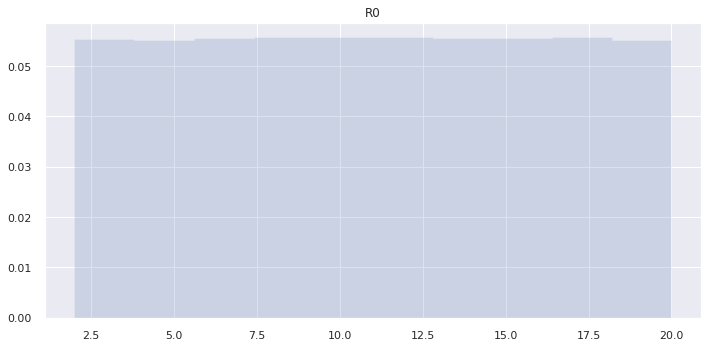

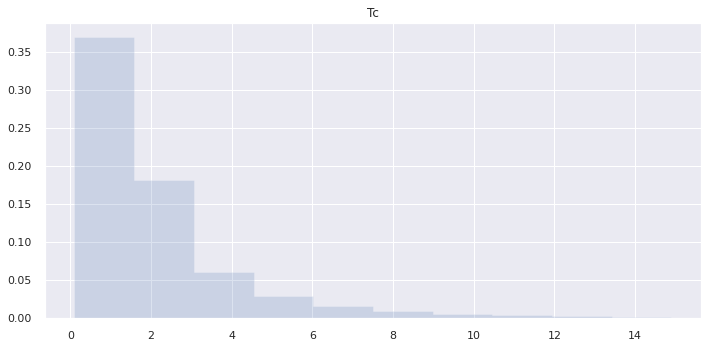

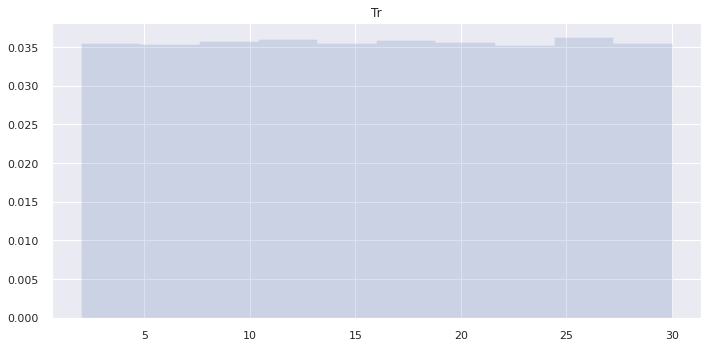

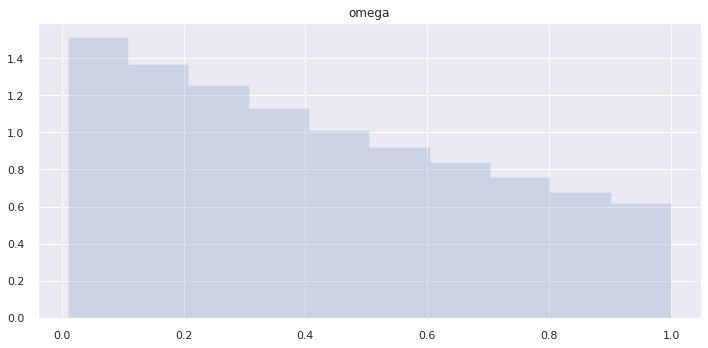

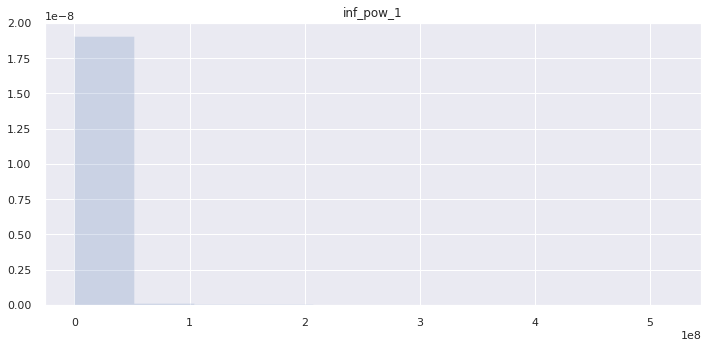

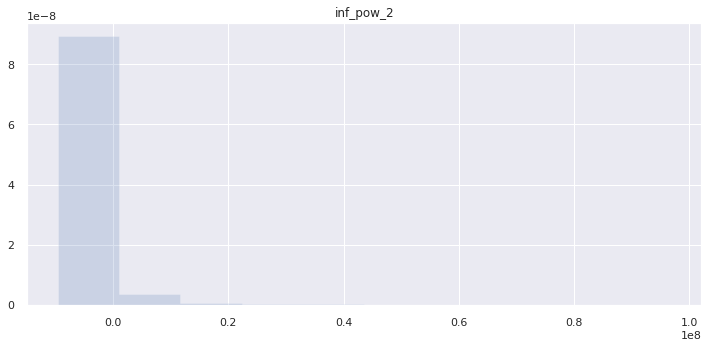

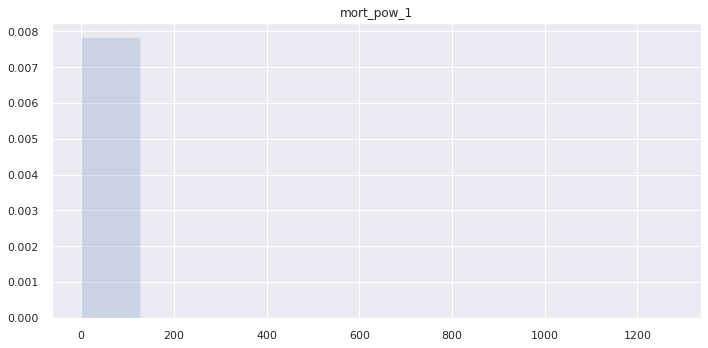

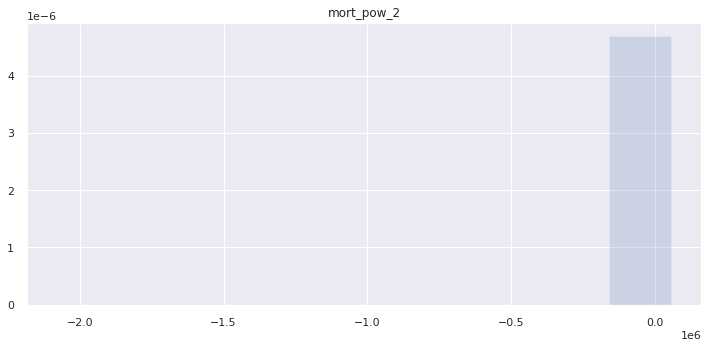

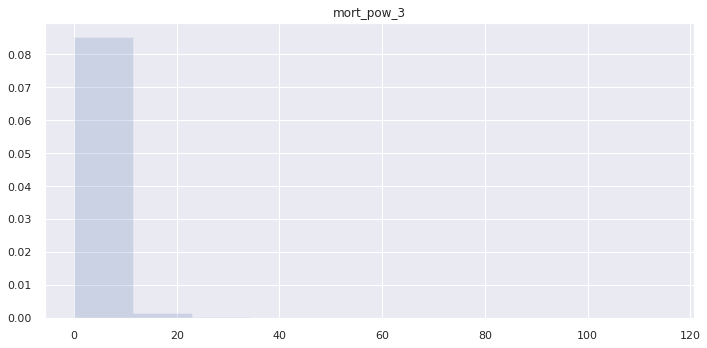

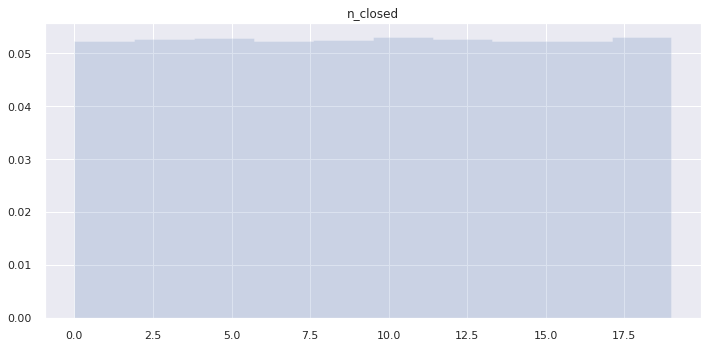

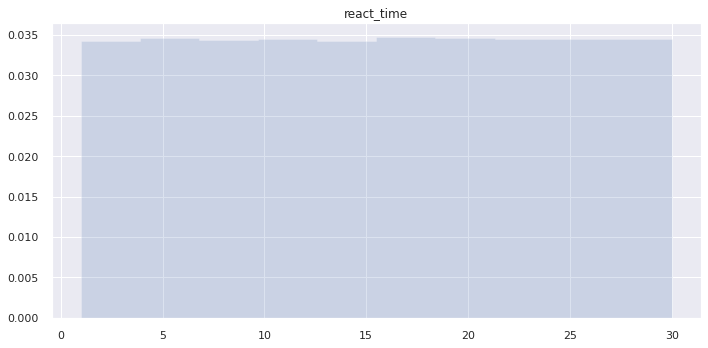

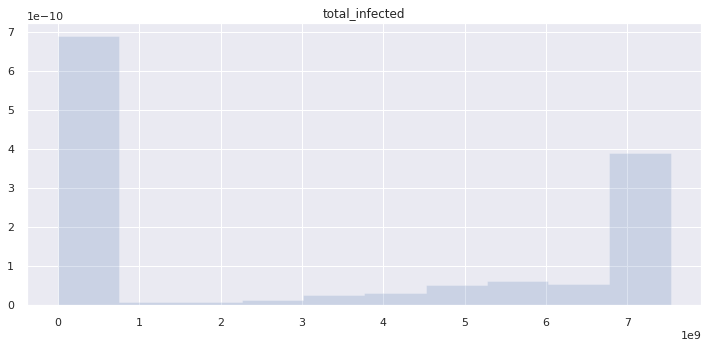

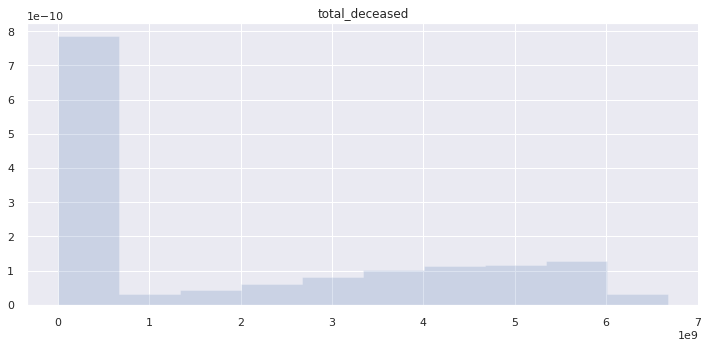

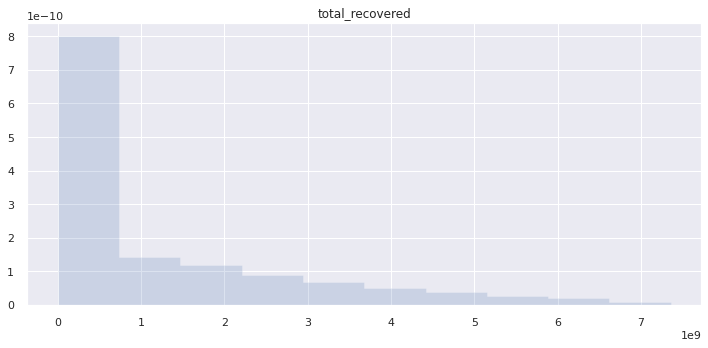

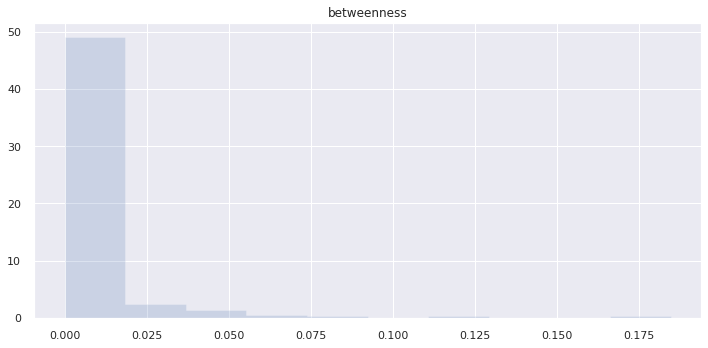

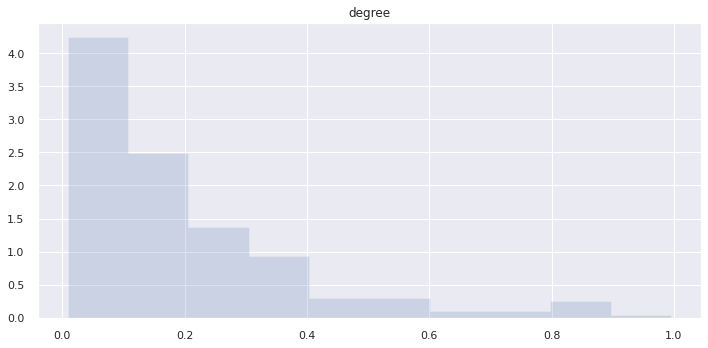

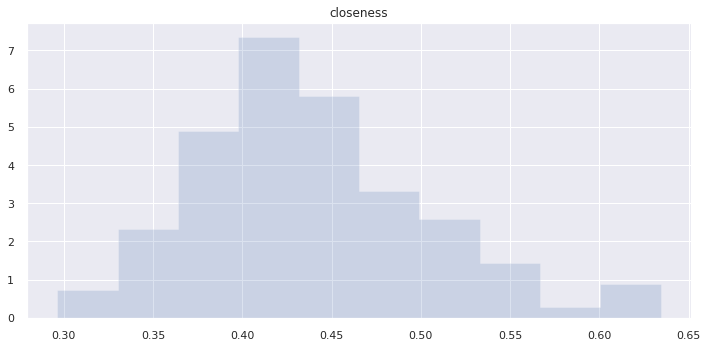

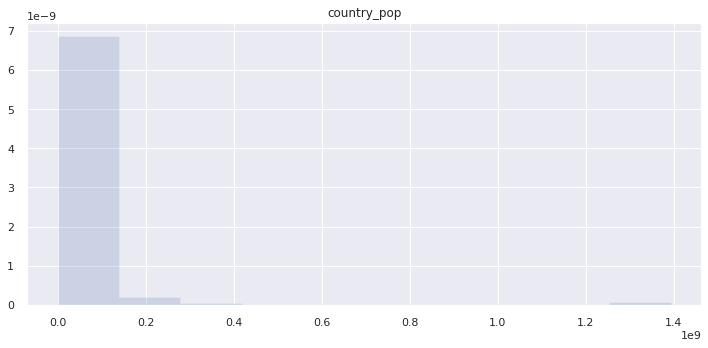

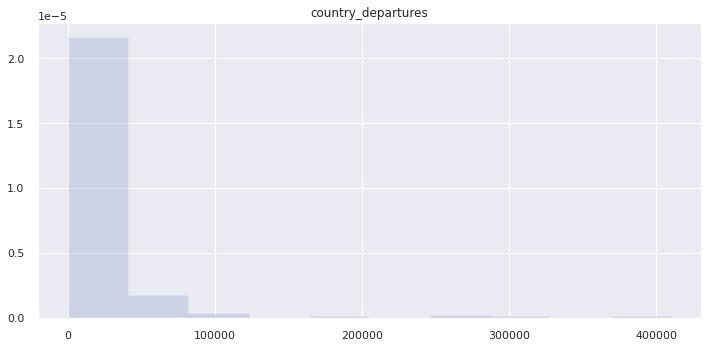

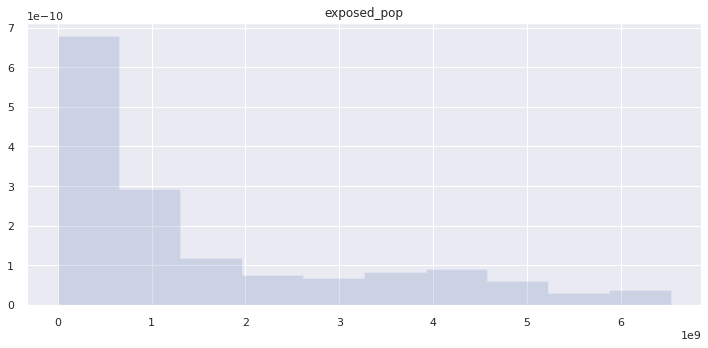

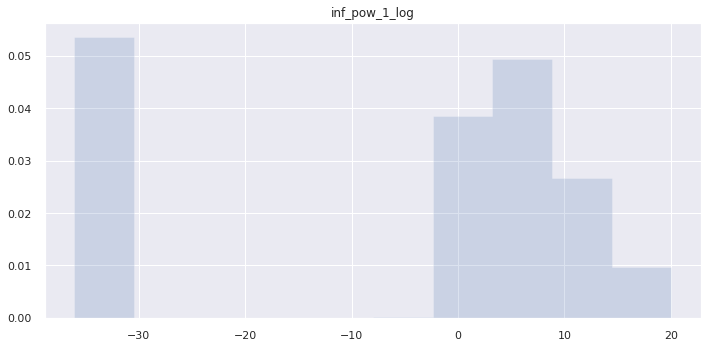

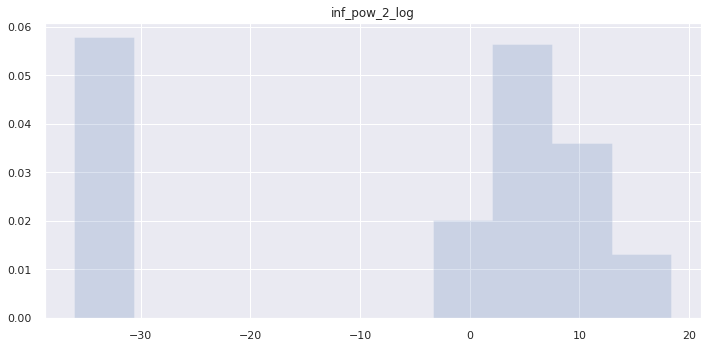

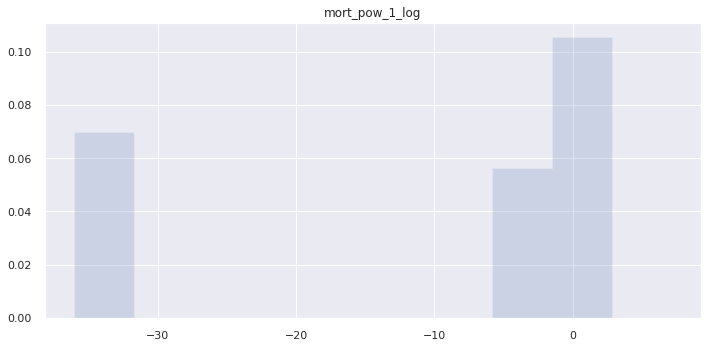

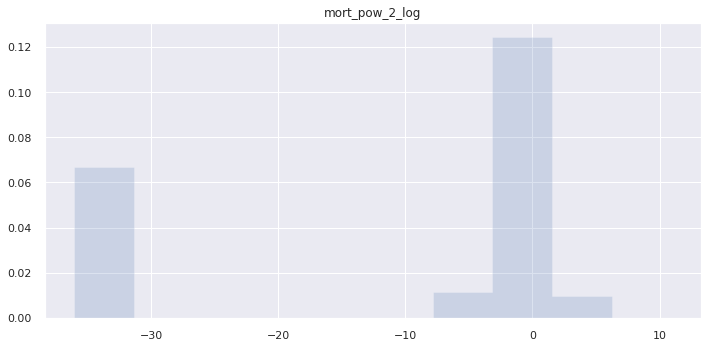

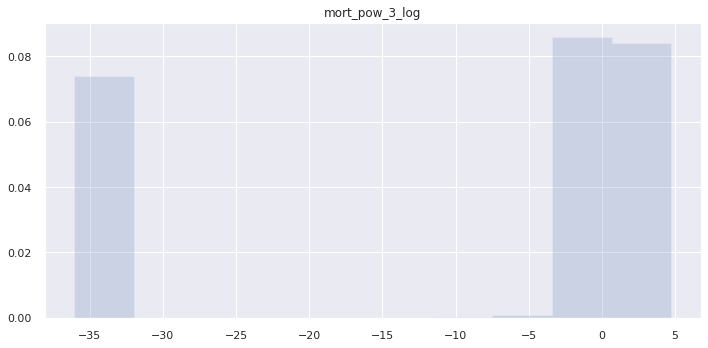

In [6]:
columns = df.describe().columns

for c in columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # df[c].plot(kind='hist', ax=ax, title=str(c))
    ax.hist(df[c], density=True, histtype='stepfilled', alpha=0.2)
    ax.set(title=str(c))
    plt.tight_layout()

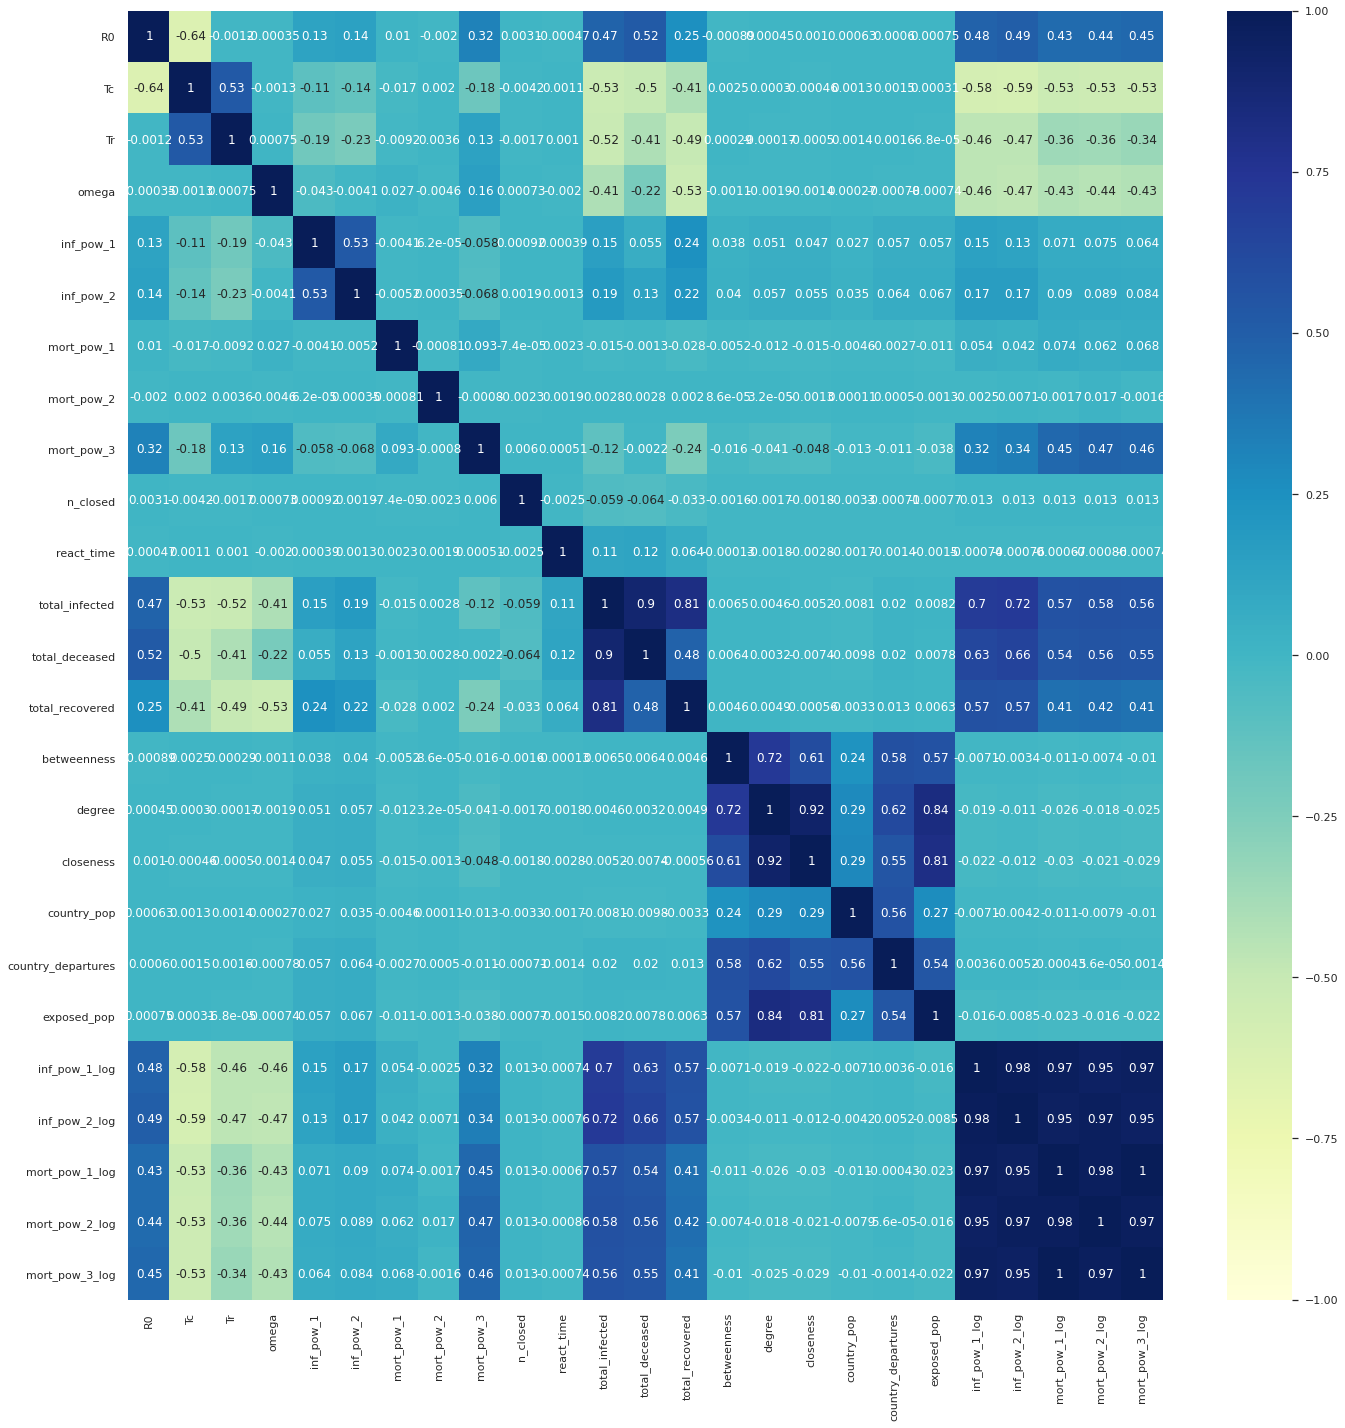

In [7]:
corr_matrix = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(corr_matrix, vmax=1, vmin=-1, annot=True, cmap="YlGnBu", ax=ax)
plt.tight_layout()